In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["font.size"] = "12"

## Importing the libraries and data

In [2]:
data = pd.read_csv("TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
numerical_cols = ['Age','Annual_Premium','Vintage']
categorical_cols = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
label_cols = ['Region_Code','Policy_Sales_Channel']
target = ['Response']

## Dividing the columns on basis of the kind of data they carry

In [6]:
data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0


In [7]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
data.duplicated().value_counts()

False    381109
dtype: int64

# No nulls, no duplicates

In [9]:
data.drop('id',axis=1,inplace=True)

In [10]:
data[label_cols] = data[label_cols].astype('int64')

### Dropping id column as it is reduntant

# Univariate analysis

### Checking for outliers in numerical columns

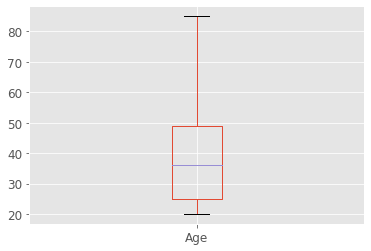

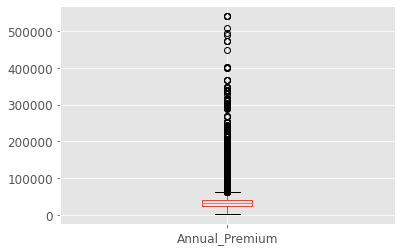

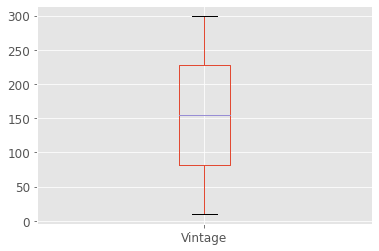

In [11]:
for i in data[numerical_cols]:
    plt.figure()
    data.boxplot([i],grid=True,figsize=(6,6))

### Annual premium has outliers because the premium amount depends on various factors. New and expensive cars generally have high amounts

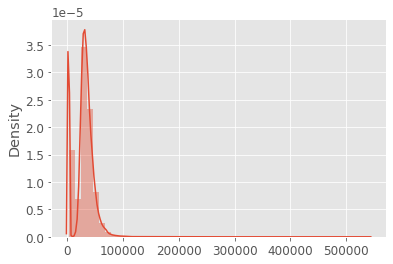

In [12]:
sns.distplot(x=data['Annual_Premium']);

## Right Skewed distribution
## We can apply log transformation to see better

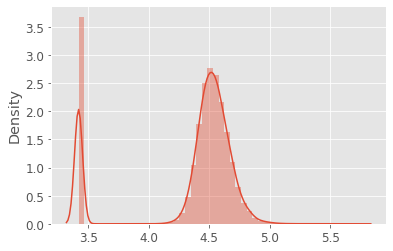

In [13]:
sns.distplot(x=np.log10(data['Annual_Premium']));

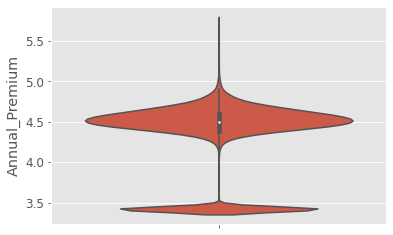

In [14]:
sns.violinplot(y=np.log10(data['Annual_Premium']));

### This indicates our data has various magnitudes of premium amounts. The model can learn a lot better due to more scope

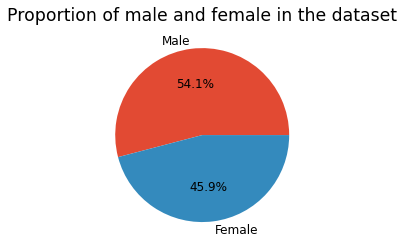

In [15]:
data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.title("Proportion of male and female in the dataset");

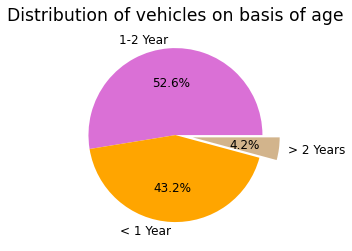

In [16]:
data['Vehicle_Age'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0,0.2],colors=['orchid','orange','tan'])
plt.ylabel("")
plt.title("Distribution of vehicles on basis of age");

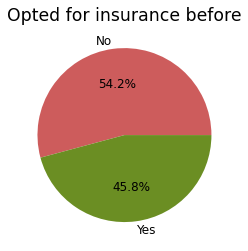

In [17]:
data['Previously_Insured'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['No','Yes'],colors=['indianred','olivedrab'])
plt.ylabel("")
plt.title("Opted for insurance before");

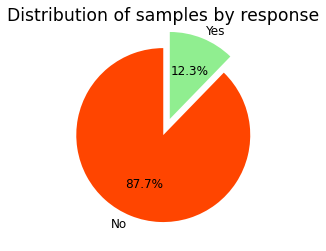

In [18]:
data['Response'].value_counts().plot(kind='pie',colors=['orangered','lightgreen'],explode=[0,0.2],autopct='%1.1f%%',startangle=90,labels=['No','Yes'])
plt.ylabel("")
plt.title("Distribution of samples by response");

### Function for plotting the distribution of categorical variables with target

In [19]:
def plot_cat(col_name):
    tmp_df = pd.crosstab(data[col_name],data['Response'])
    new_df = pd.DataFrame()
    tmp_df['sum'] = tmp_df.sum(axis=1)
    new_df[0] = tmp_df[0]/tmp_df['sum'] * 100
    new_df[1] = tmp_df[1]/tmp_df['sum'] * 100
    ax = new_df.plot(kind='bar');
    ax.set_ylim((0, 110))
    plt.ylabel('Percentage')
    plt.title(f'% Response by {col_name}')
    for i,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.1f} %'.format(height), ha="center")
    plt.show()

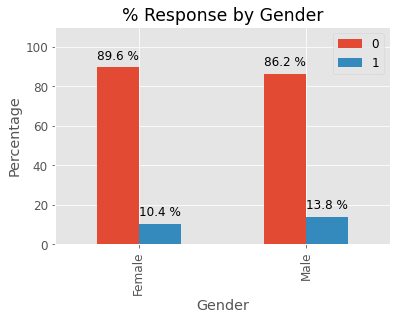

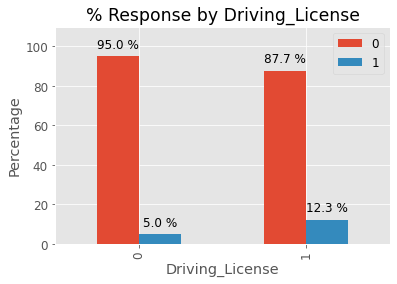

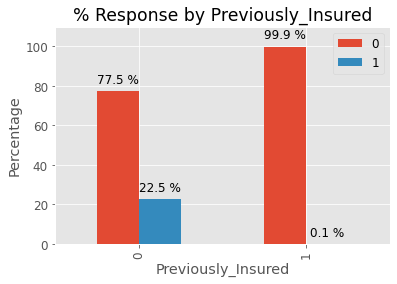

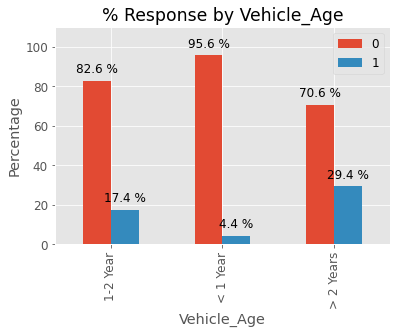

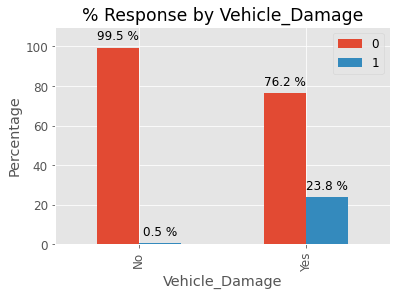

In [20]:
for i in categorical_cols:
    plot_cat(i)

### Manually encoding the vehicle age column on basis of what cateogory has most positive responses

In [21]:
veh_age_dict = {'1-2 Year':3,
                '< 1 Year':2,
                '> 2 Years':1               
                }

In [22]:
data['Veh_age_group'] = data["Vehicle_Age"].map(veh_age_dict)

In [23]:
data.drop('Vehicle_Age',axis=1,inplace=True)

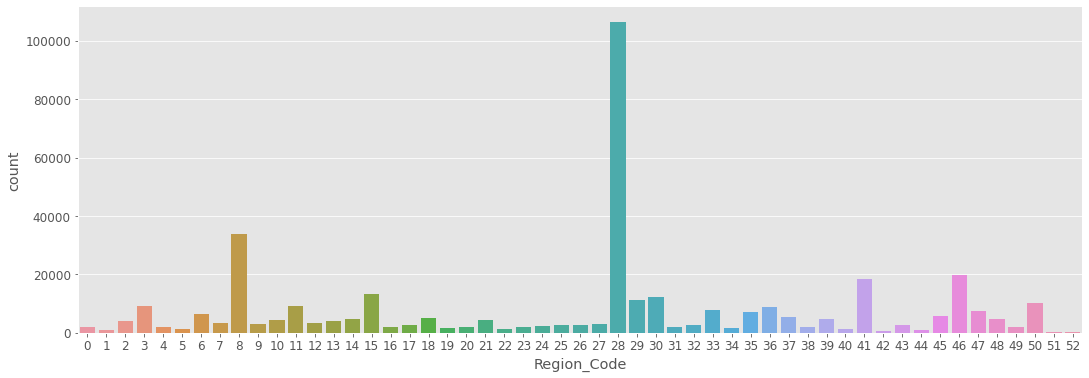

In [24]:
plt.figure(figsize = (18,6))
sns.countplot(data['Region_Code']);

### Region 28 is the most frequent as well as has the most interested people

In [25]:
list(data['Region_Code'].value_counts().head(5).index)

[28, 8, 46, 41, 15]

## Top 5 region 

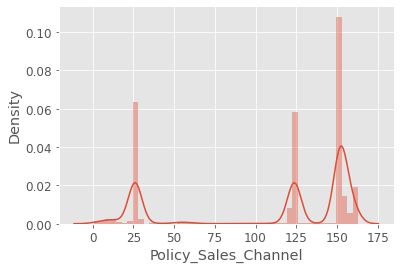

In [26]:
sns.distplot(data['Policy_Sales_Channel']);

In [27]:
list(data['Policy_Sales_Channel'].value_counts().head(5).index)

[152, 26, 124, 160, 156]

## Top 5 poilcy channels

# Bivariate analysis

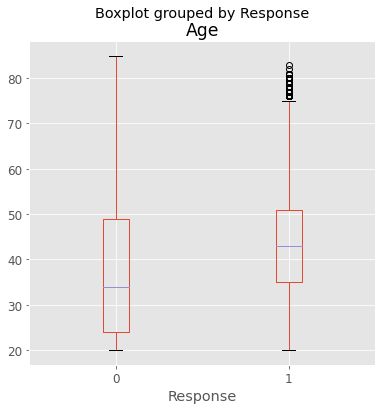

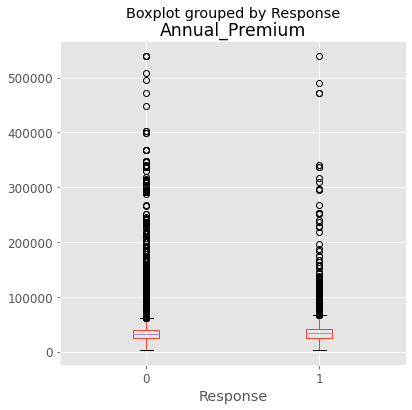

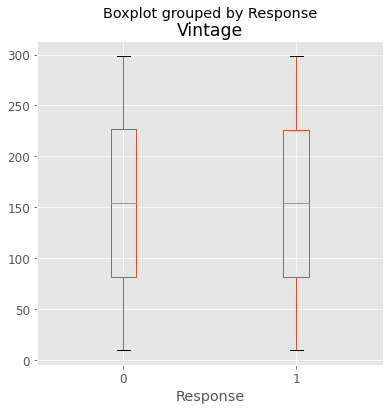

In [28]:
for i in numerical_cols:
    data.boxplot(column=i,by='Response',figsize=(6,6))

## Annual premium has outliers 
## Age also has outliers for when the response is positive. It can be possible as there can be old-retired people who are rich and have bought a car and want it insured.

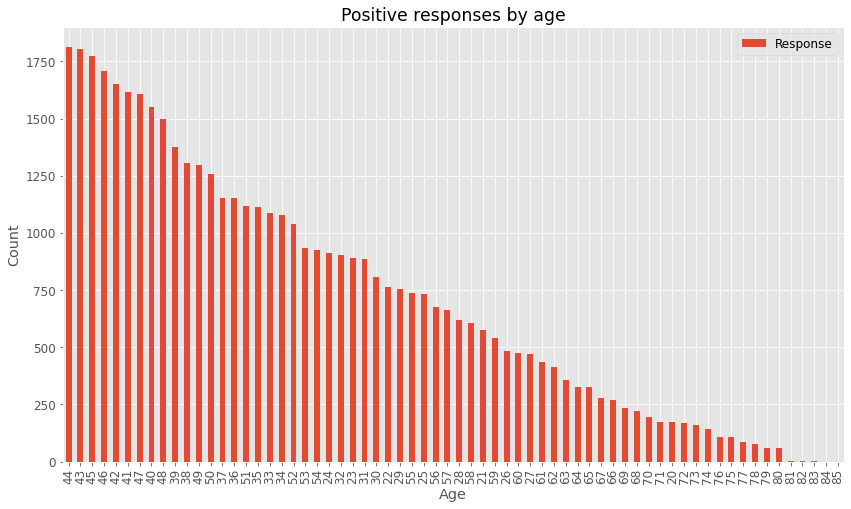

In [35]:
pd.DataFrame(data.groupby(['Age'])['Response'].sum()).sort_values('Response',ascending=False).plot(kind='bar',figsize=(14,8))
plt.ylabel("Count")
plt.title("Positive responses by age");

## People in the age group 35-55 have maximum probability of taking insurance as compared to others. There can be many reasons such as 
### 1 - affordability
### 2 - family responsibilities
### 3 - coverage in the event of loss

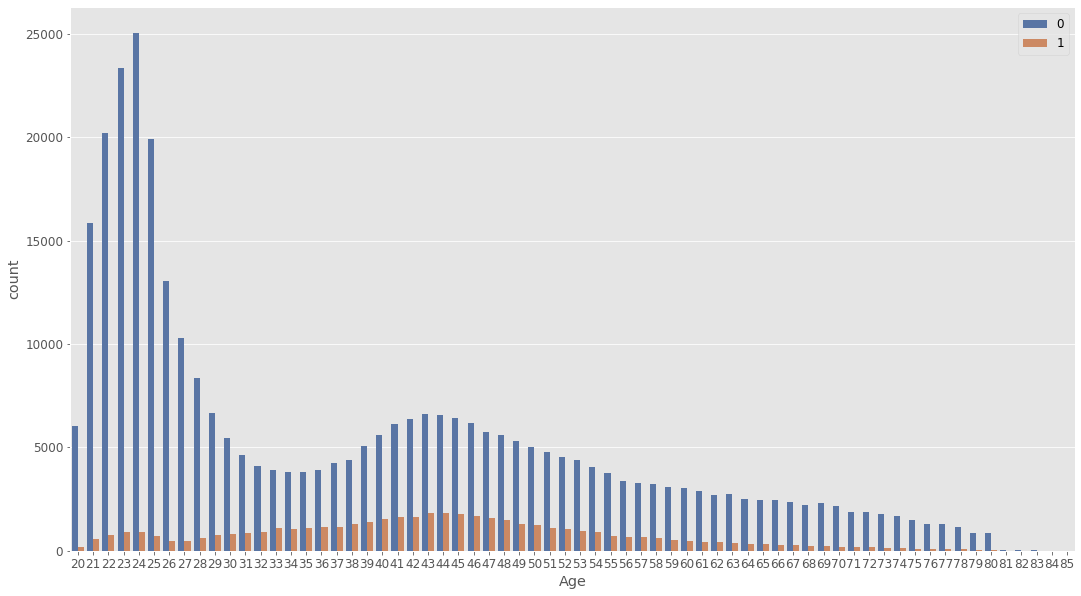

In [30]:
plt.subplots(figsize=(18,10))
sns.countplot('Age',hue='Response',data=data,palette='deep')
plt.legend(loc='upper right',fontsize=12);

### Young people don't opt for insurance most of the times as it is possible they own a handed down or second hand car so they don't see any benefit in insuring it.
### Also people in this age group generally are not financially stable so they can't afford extra expenses like insurance premiums

### Older people also don't opt for insurance mainly due to the fact that they are retired and don't have enough saved funds for premium payments. 
### However, some people in our dataset took insurance which was reflected in our earlier analysis.
### These may be people who are rich or have good pool of savings.

## Preparing data for modelling

In [31]:
data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data['Vehicle_Damage']=data['Vehicle_Damage'].replace({'Yes':1,'No':0})

## Manually encoding categorical columns

In [32]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Veh_age_group
0,1,44,1,28,0,1,40454.0,26,217,1,1
1,1,76,1,3,0,0,33536.0,26,183,0,3
2,1,47,1,28,0,1,38294.0,26,27,1,1
3,1,21,1,11,1,0,28619.0,152,203,0,2
4,0,29,1,41,1,0,27496.0,152,39,0,2


In [33]:
X = data.drop('Response',axis=1)
y = data['Response']

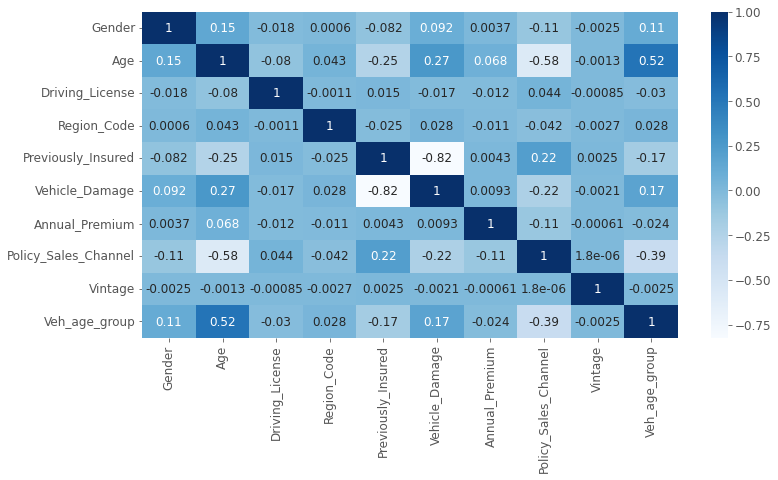

In [34]:
plt.subplots(figsize=(12,6))
cor = X.corr()
sns.heatmap(cor,annot=True,cmap='Blues');

## Only 2 variables are highly correlated.
## Vehicle_damage and previously_insured

### This observation is supported by the fact that people who have had vehicles with damage in the past opted for insurance after.
### Now if they change their car or buy a new one, they would want it insured because of previous experiences